# Bank Marketing Data Set
For this notebook we will be looking at the [Bank Marketing Data Set by UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [342]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, accuracy_score

from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [343]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [344]:
# Change the path to your own path
path = "/content/drive/My Drive/Colab Notebooks/Practice/Datasets/"
# Load the file - add the file's name
data = pd.read_csv(path+"banking.csv")

## Data Exploration

There are 21 different columns with different values. Let's investigate what each column means: <br><br>
**1** - age (numeric) <br>
**2** - job : type of job (categorical: 'admin.','blue-collar','entrepreneur',
'housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
**3** - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
**4** - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
**5** - default: has credit in default? (categorical: 'no','yes','unknown') <br>
**6** - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
**7** - loan: has personal loan? (categorical: 'no','yes','unknown') <br><br>
**related with the last contact of the current campaign**:<br><br>
**8** - contact: contact communication type (categorical: 'cellular','telephone')<br>
**9** - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
**10** - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
**11** - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br><br>
**other attributes**:<br><br>
**12** - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
**13** - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
**14** - previous: number of contacts performed before this campaign and for this client (numeric)<br>
**15** - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br><br>
**social and economic context attributes**<br><br>
**16** - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
**17** - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
**18** - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
**19** - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
**20** - nr.employed: number of employees - quarterly indicator (numeric)<br>

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Let's investigate if there are any NA values.

In [346]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no NA values in the dataset, meaning that we can proceed to exploring the data itself now

In [347]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [348]:
# Print the unique values for every single column
for column in data.columns.unique():
  print(column, ":\n")
  print(data[column].unique())
  print("_" * 80, end="\n\n")

age :

[44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]
________________________________________________________________________________

job :

['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
________________________________________________________________________________

marital :

['married' 'single' 'divorced' 'unknown']
________________________________________________________________________________

education :

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
________________________________________________________________________________

default :

['unknown' 'no' 'yes']
______________________________________________________

As mentioned in the latter attribute information - divorced can mean either divorced or widowed. We can edit this value to be more accurate.

In [349]:
data.loc[data['marital'].str.contains("divorced"), "marital"] = "divorced / widowed"

There are 3 different types of basic education - 4 years, 6 years and 9 years. To simplify the data, the basic education types will be comebined into one single "basic" education.

In [350]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

The dataset is very unbalanced. There are way more **no** than **yes**.

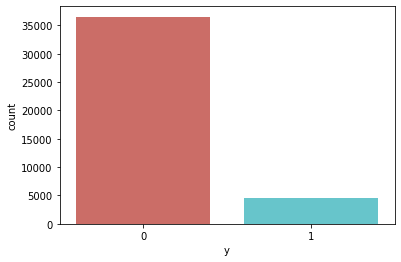

In [351]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [352]:
# Display the yes and no rate in percentages
yes = len(data.loc[data['y'] == 1])
no = len(data.loc[data['y'] == 0])

print("% of yes:\t", round((yes / (yes + no) * 100), 2), "\n")
print("% of no:\t", round((no / (yes + no) * 100), 2))

% of yes:	 11.27 

% of no:	 88.73


Visualizing the mean of customers who got a term deposit can give us some more valuable information about the data and its features.

In [353]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Let's measure the tendencies of all of the numeric data (with the exception of column y, which is the prediction).

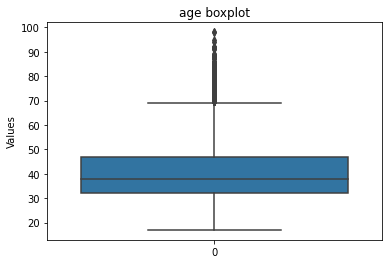

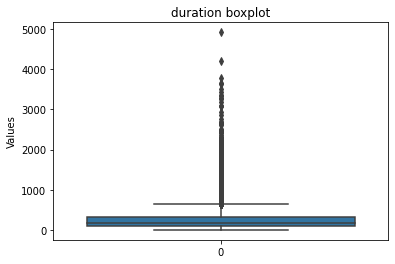

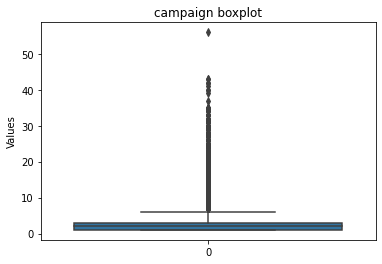

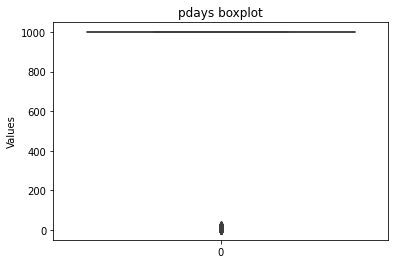

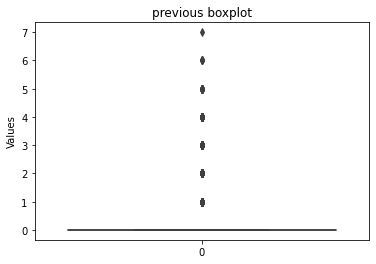

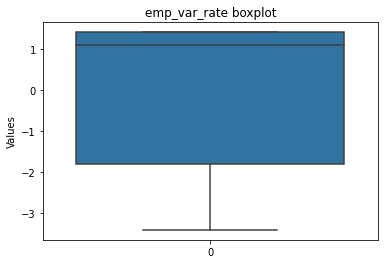

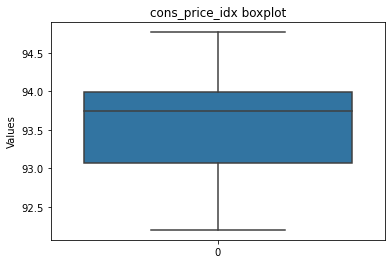

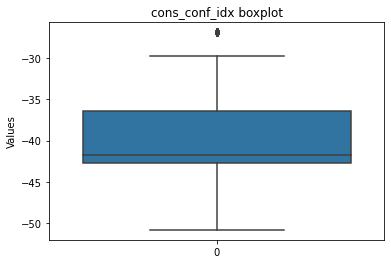

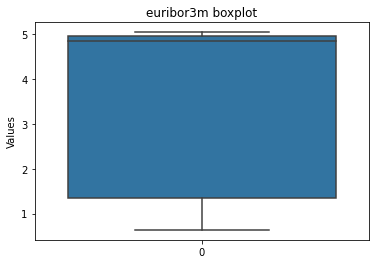

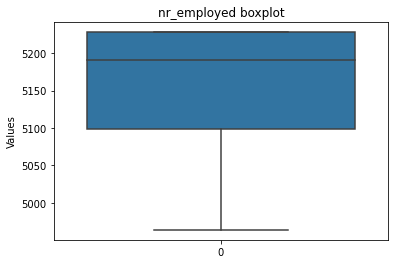

In [354]:
types = ['int64', 'float64']
boxplot_data = data.drop(labels=['y'], axis=1)

for type in types:
  for column in boxplot_data.select_dtypes(include=[type]).columns:
    sns.boxplot(data=boxplot_data[column])
    plt.title(column + " boxplot")
    plt.ylabel("Values")
    plt.show()
    print("\n\n\n")

Columns *pdays* and *previous* seem odd and will need further further exploration.

In [355]:
# Count the values of pdays
boxplot_data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

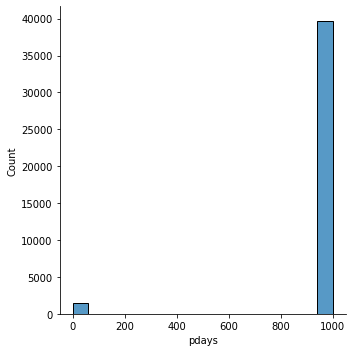

In [356]:
sns.displot(boxplot_data['pdays'])

In [357]:
# Count the values of previous
boxplot_data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

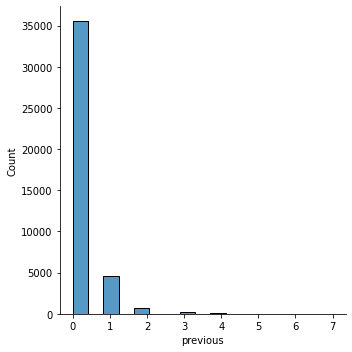

In [358]:
sns.displot(boxplot_data['previous'])

Now lets visualize all of the non-numeric values.

In [359]:
def plot_y(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  # Put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  # Adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  ax.legend(labels=["no","yes"])
  plt.show()
  print("\n\n\n")

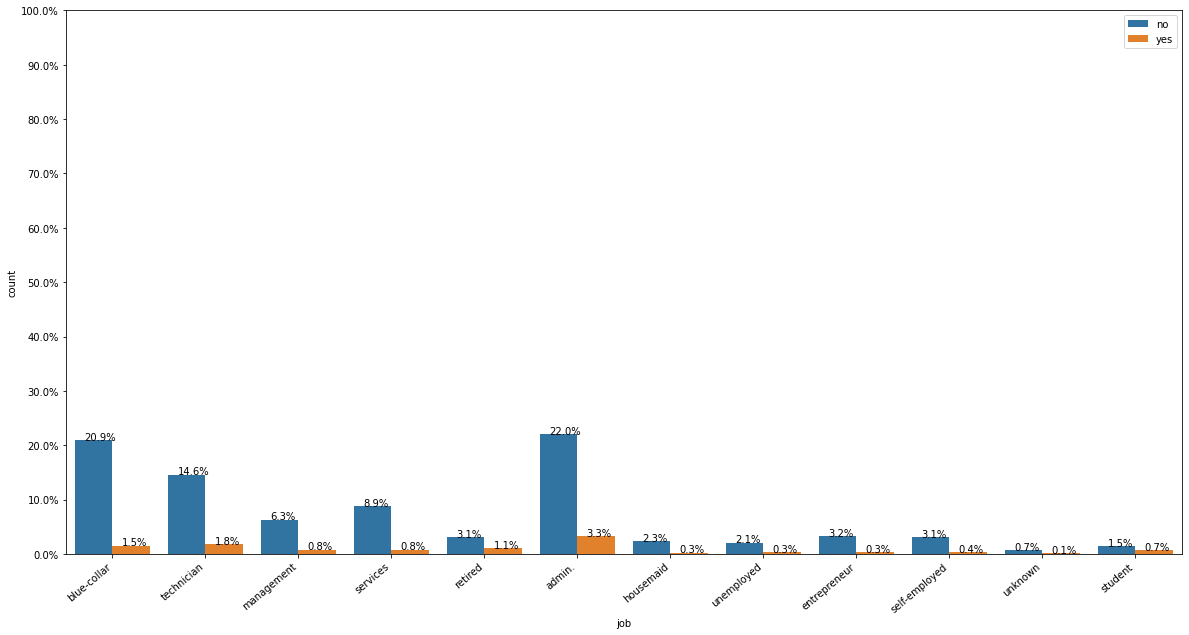

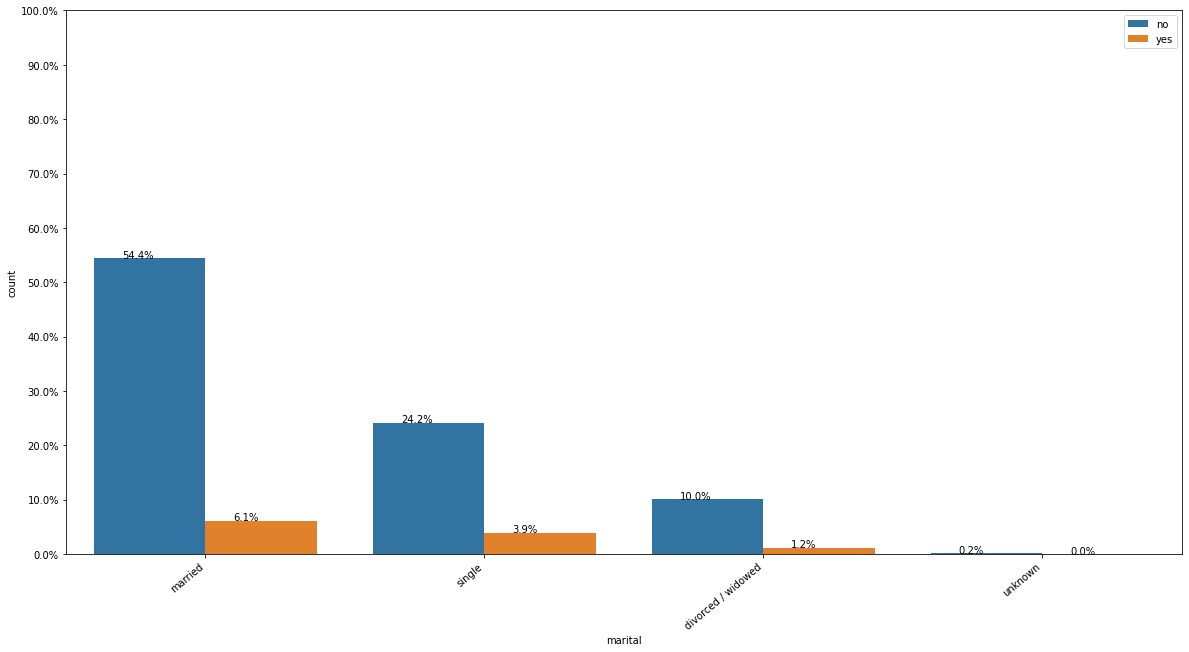

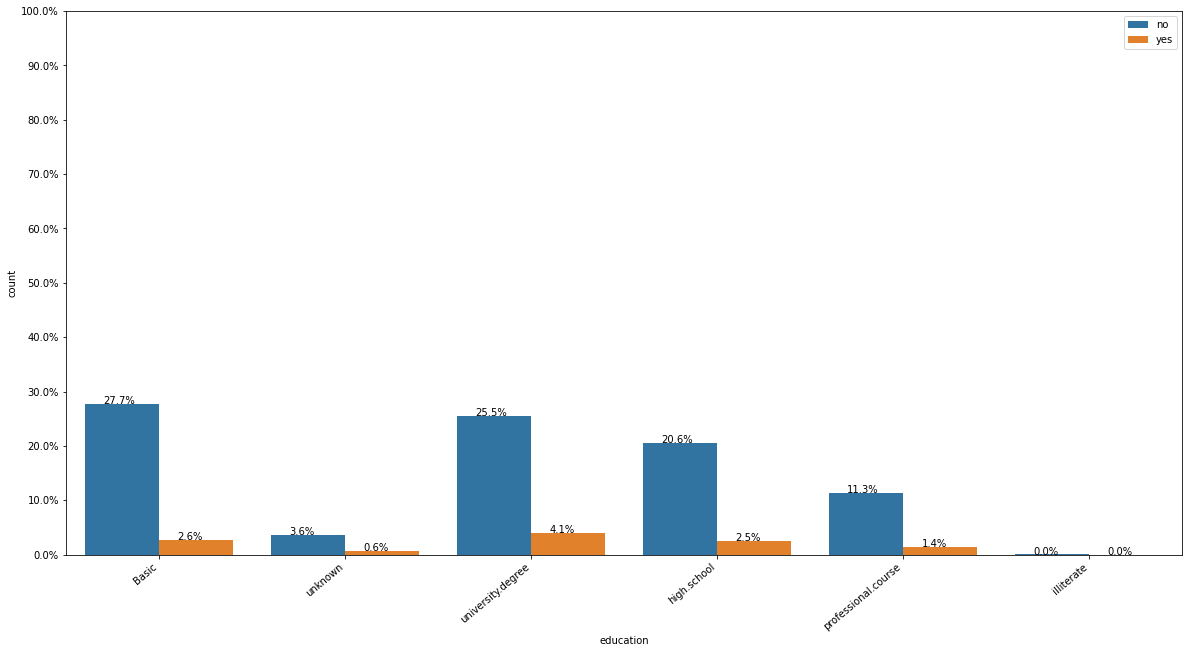

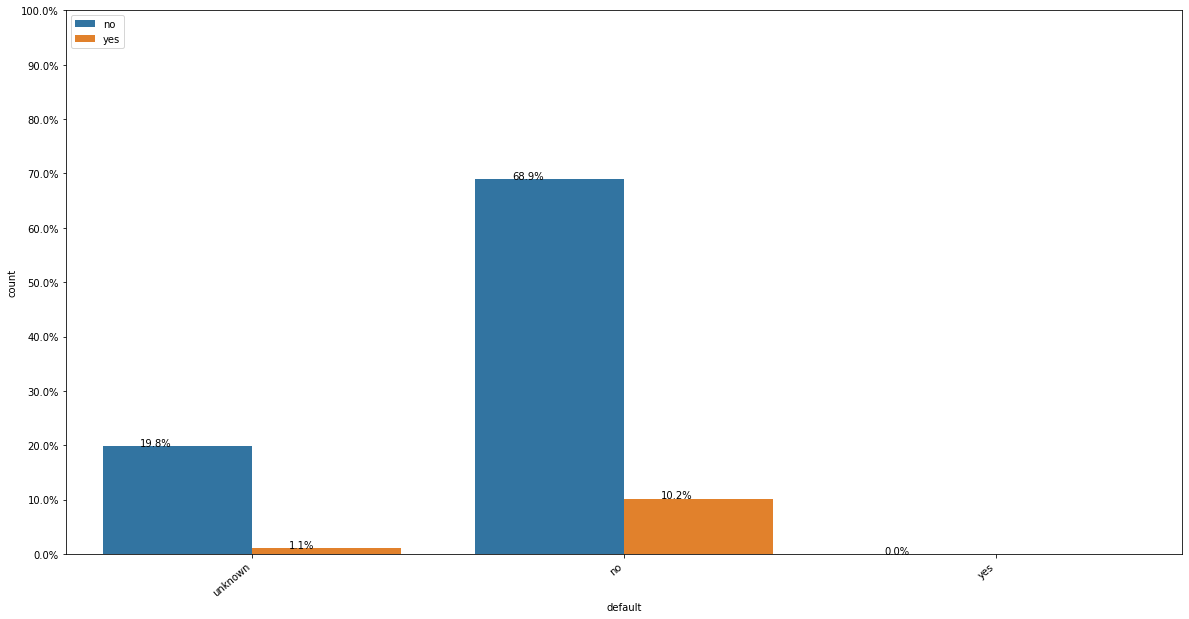

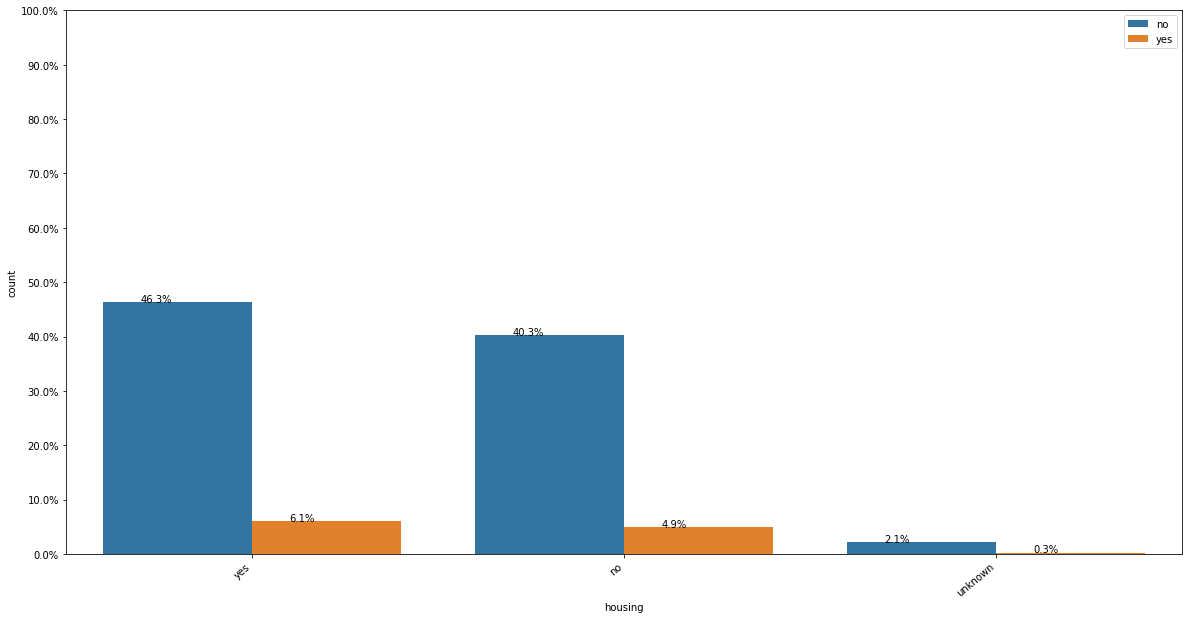

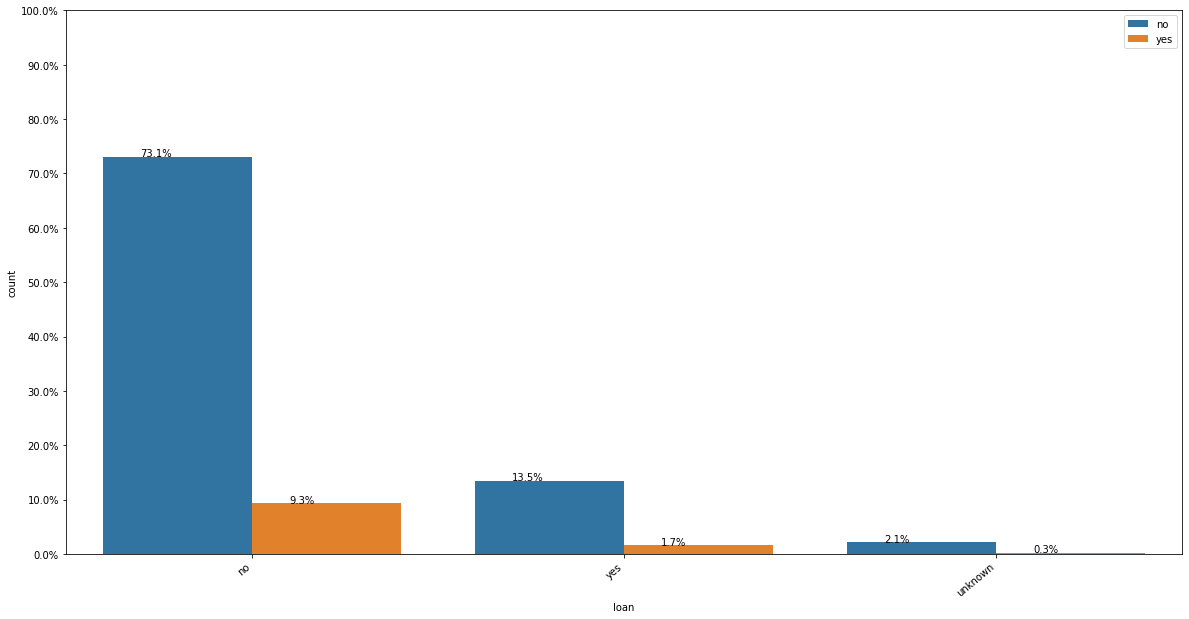

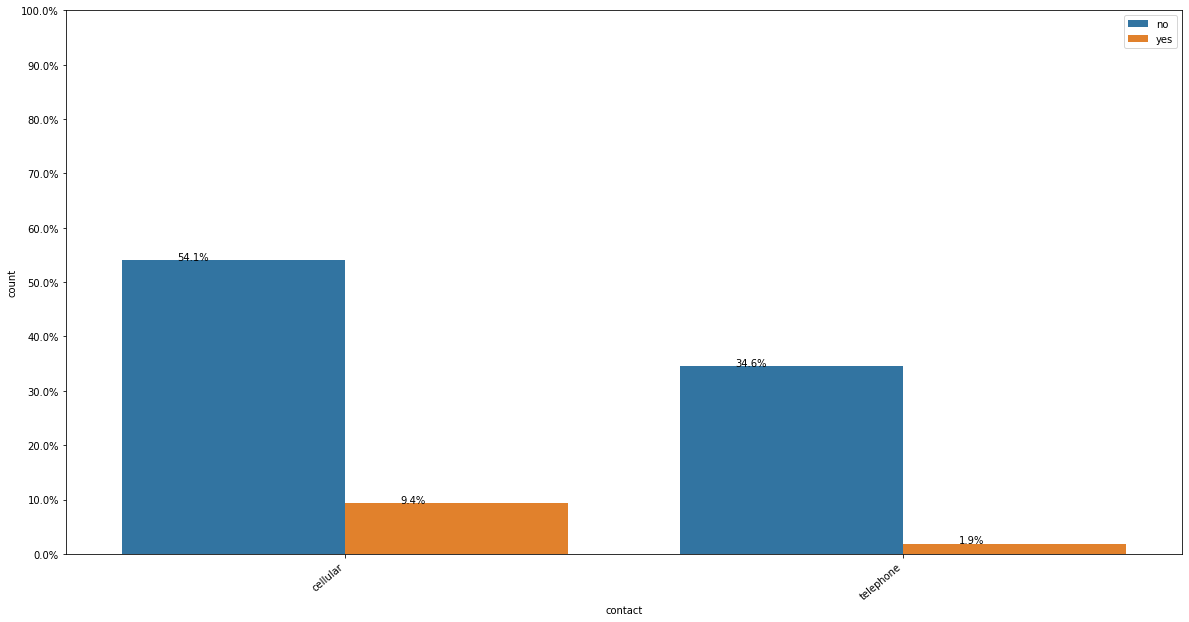

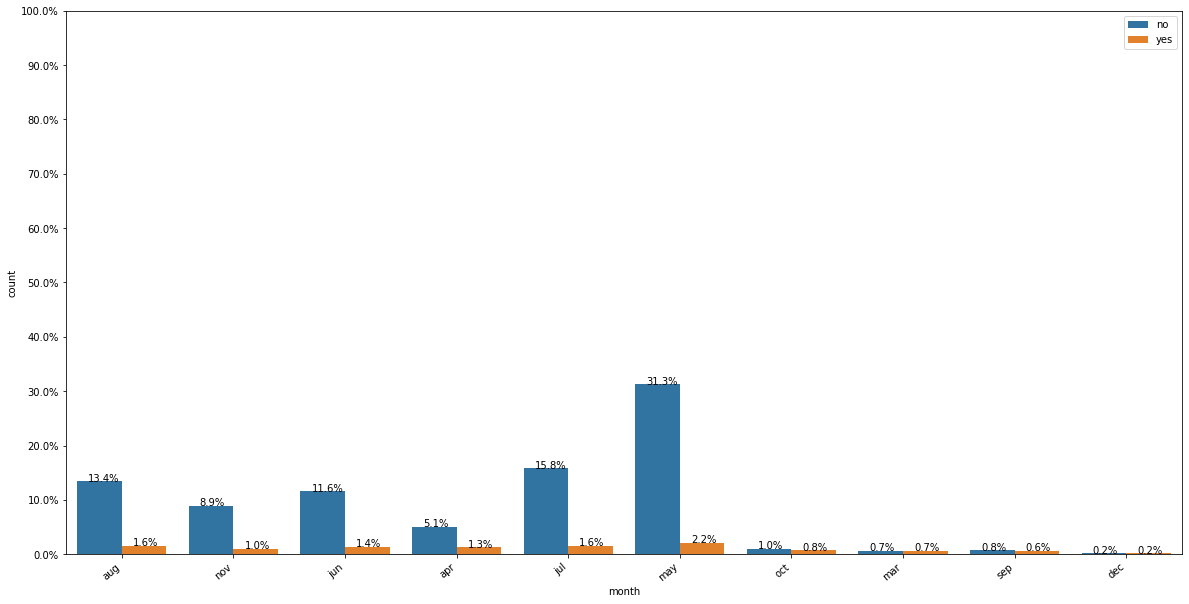

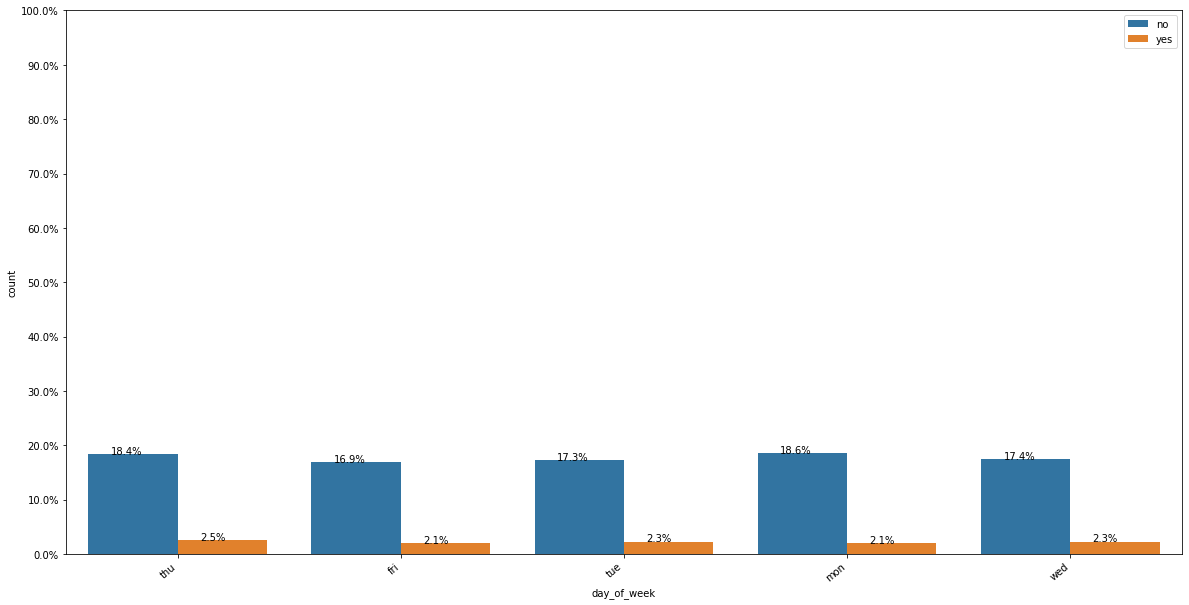

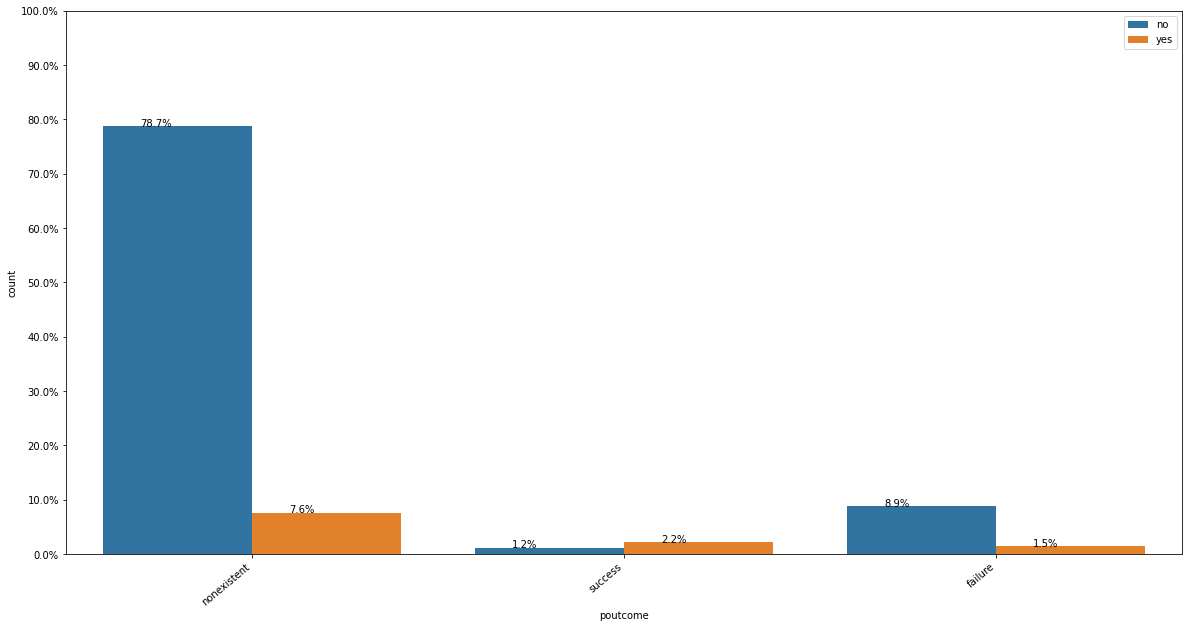

In [360]:
# For each object column - display a plot with the yes and no results
for column in data.select_dtypes(include=['object']).columns:
  plot_y(column, data)

Let's see the correlation between all the different features.

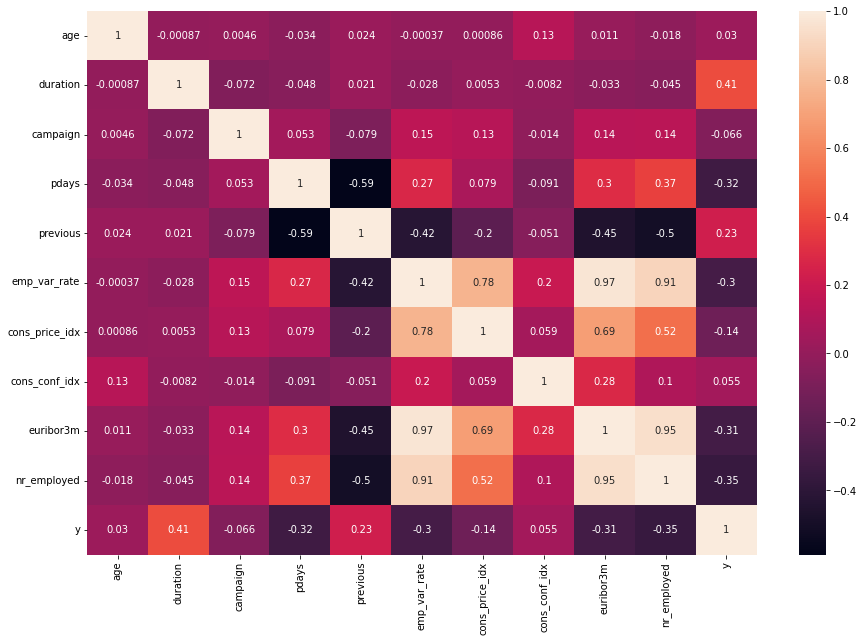

In [361]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Preparation
In order to apply logistic regression on the data, the non-numerical columns has to be converted to numbers.

In [362]:
# Non numerical columns
cat_vars= data.select_dtypes(include=['object']).columns.values

# Convert all of the non numeric values to 0s and 1s
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1

data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
# Remove all of the non numeric columns from the data
data_final = data[to_keep]

In [363]:
# Split data into X and Y variablec
X = data_final.loc[:, data_final.columns != 'y']
Y = data_final.loc[:, data_final.columns == 'y']

However there are too many columns in the data and majority of it might not be used and it could slow down the Logistic Regression algorithm. We can run a Recursive Feature Elimination to select the most relevant features from the dataset.

In [364]:
print("Total number of columns before RFE: ", len(X.columns))

Total number of columns before RFE:  61


In [365]:
# Split the data into train and test - 70 / 30
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=0)

In [366]:
# Apply RFE technique - make the columns 20
logreg = LogisticRegression()

prefit = RFE(logreg, 20)
prefit = prefit.fit(xTrain, yTrain.values.ravel())

In [367]:
# Get all of the true columns from prefit.support_
index = 0
columns = []
for outcome in prefit.support_:
  if outcome:
    columns.append(xTrain.columns.values[index])
  index += 1

# Remove redundant columns from initial data
X = X[columns]

In [368]:
print("Total number of columns after RFE: ", len(X.columns))

Total number of columns after RFE:  20


## Logistic Regression
Let's see how the results differ for normal linear regression, weighted linear regression and SMOTE.

In [369]:
# Evaluation function
def evaluate(testX, testY, predictions, model):
  results = confusion_matrix(testY, predictions)
  # True Positive
  TP = results[0][0]
  # False Positive
  FP = results[0][1]
  # False Negative
  FN = results[1][0]
  # True Negative
  TN = results[1][1]

  print(classification_report(testY, predictions), "\n")
  
  print("TP = ", TP, "\t\t\tFP = ", FP, "\n")
  print("FN = ", FN, "\t\t\tTN = ", TN, "\n")
  print("\nAccuracy: ", accuracy_score(testY, predictions), "\n")
  logit_roc_auc = roc_auc_score(testY, model.predict(testX))
  fpr, tpr, thresholds = roc_curve(testY, model.predict_proba(testX)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()  

In [370]:
# Split the data into train and test data - 70/30
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=5)

### Normal Logistic Regression
The unbalanced dataset will be given to a normal linear regression model.


In [371]:
# Training the model
lr = LogisticRegression()
lr.fit(trainX, trainY)

# Getting the predictions testX the model
predictions = lr.predict(testX)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10986
           1       0.67      0.20      0.31      1371

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.88     12357
 

TP =  10855 			FP =  131 

FN =  1099 			TN =  272 


Accuracy:  0.9004612770089827 



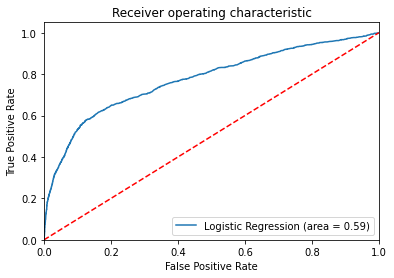

In [372]:
evaluate(testX, testY, predictions, lr)

### Weighted Logistic Regression
The dataset is highly unbalanced and this can impact the prediction. Let's apply weights to the algorithm, so we penalize the data points which were predicted wrong from the minority class.

In [373]:
# Training the model with weights
lr = LogisticRegression(class_weight='balanced')
lr.fit(trainX, trainY)

# Getting the predictions from the model
predictions = lr.predict(testX)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10986
           1       0.29      0.65      0.40      1371

    accuracy                           0.78     12357
   macro avg       0.62      0.73      0.63     12357
weighted avg       0.88      0.78      0.82     12357
 

TP =  8802 			FP =  2184 

FN =  479 			TN =  892 


Accuracy:  0.7844946184348952 



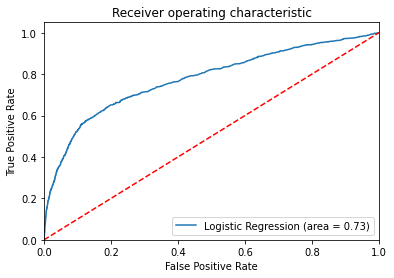

In [374]:
evaluate(testX, testY, predictions, lr)

### SMOTE Logistic Regression
Looks like the normal Logistic Regression model is more accurate than the weighted one. Let's apply Synthetic Minority Ovesampling Technique (SMOTE).

In [375]:
smote = SMOTE(random_state = 5)

# Resample the train and test sets
trainX, trainY = smote.fit_resample(trainX, trainY)
testX, testY = smote.fit_resample(testX, testY)

print("SMOTE training data:\t", Counter(trainY), "\n")
print("SMOTE test data:\t", Counter(testY))

SMOTE training data:	 Counter({0: 25562, 1: 25562}) 

SMOTE test data:	 Counter({0: 10986, 1: 10986})


In [376]:
# Training the model with weights
lr = LogisticRegression()
lr.fit(trainX, trainY)

# Getting the predictions from the model
predictions = lr.predict(testX)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10986
           1       0.76      0.65      0.70     10986

    accuracy                           0.72     21972
   macro avg       0.73      0.72      0.72     21972
weighted avg       0.73      0.72      0.72     21972
 

TP =  8678 			FP =  2308 

FN =  3799 			TN =  7187 


Accuracy:  0.722055343164027 



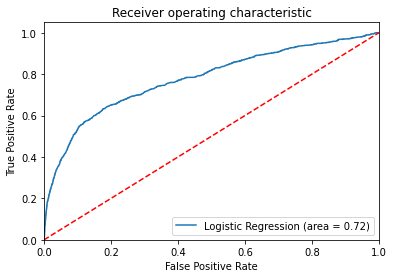

In [377]:
evaluate(testX, testY, predictions, lr)